In [1]:
#import the necessary packages
import pandas as pd
import numpy as np
from patsy import dmatrices
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
# read csv files
df = pd.read_csv('logistic_regression_original.csv')

In [3]:
features="+".join(df.columns)

print(features)

Age+GS+G+Assist_Pct+Usage_Pct+DRtg+Rising_Star


In [6]:
y,X = dmatrices('Rising_Star~Age+GS+G+Assist_Pct+Usage_Pct+DRtg',df,return_type='dataframe')

In [7]:
 from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif.round(1)

,VIF Factor,Features
0,1.0,Intercept
1,1.0,Age
2,2.3,GS
3,2.1,G
4,1.2,Assist_Pct
5,1.3,Usage_Pct
6,1.0,DRtg


In [8]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score

x = df.drop('Rising_Star', axis=1)
y = df['Rising_Star']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)
#print(logmodel.summary())

predictions = logmodel.predict(x_test)
print('Classification Report')
print(classification_report(y_test, predictions))
print('Confusion Matrix')
print(confusion_matrix(y_test, predictions))
print('Accuracy Score')
print(accuracy_score(y_test, predictions))



Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       255
           1       0.83      0.88      0.86        17

    accuracy                           0.98       272
   macro avg       0.91      0.94      0.92       272
weighted avg       0.98      0.98      0.98       272

Confusion Matrix
[[252   3]
 [  2  15]]
Accuracy Score
0.9816176470588235


In [9]:
# Cross Validation
from sklearn import model_selection
from sklearn.model_selection import KFold

x = df.drop('Rising_Star', axis=1)
y = df['Rising_Star']
kfold= model_selection.KFold(n_splits=10,random_state=None)
model_kfold = LogisticRegression()
results_kfold = model_selection.cross_val_score(model_kfold, x, y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0))

Accuracy: 96.97%


In [10]:
# check for p values
import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.614068
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: -1.297   
Dependent Variable: Rising_Star      AIC:              1348.2111
Date:               2020-06-14 12:16 BIC:              1378.1636
No. Observations:   1088             Log-Likelihood:   -668.11  
Df Model:           5                LL-Null:          -290.83  
Df Residuals:       1082             LLR p-value:      1.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     6.0000                                      
-----------------------------------------------------------------
              Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
-----------------------------------------------------------------
Age           0.3126    0.0755   4.1420  0.0000   0.1647   0.4606
GS            0.8966    0.1143   7.8470  0.0000   0.6726   1.1205
G       

In [11]:
#### Plotting ROC and AUC for Logistic Regression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [12]:
# generate a no skill prediction( for the majority class)
ns_prob = [0 for _ in range(len(y_test))]

# predict the probabilities
lr_prob= logmodel.predict_proba(x_test)

# keep the probabilities for positive outcomes only
lr_prob = lr_prob[:,1]


In [13]:
# calculate the scores 
ns_auc = roc_auc_score(y_test,ns_prob)
lr_auc = roc_auc_score(y_test,lr_prob)

In [14]:
# summarize the scores
print('Not a star: ROC AUC= %.3f'%(ns_auc))
print('Logistic: ROC AUC= %.3f'%(lr_auc))


Not a star: ROC AUC= 0.500
Logistic: ROC AUC= 0.991


In [15]:
# calculate the roc curvers
ns_fpr,ns_tpr,_ = roc_curve(y_test,ns_prob)
lr_fpr,lr_tpr,_ = roc_curve(y_test,lr_prob)


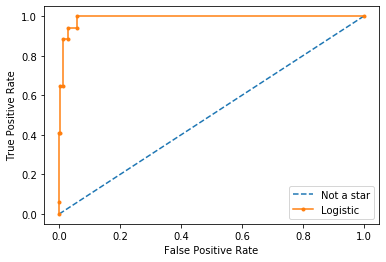

In [16]:
# plot the curve for the model
from matplotlib import pyplot
pyplot.plot(ns_fpr,ns_tpr,linestyle='--',label='Not a star')
pyplot.plot(lr_fpr,lr_tpr,marker='.',label='Logistic')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

In [17]:
### precision and recall curves
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
lr_precision,lr_recall,_= precision_recall_curve(y_test,lr_prob)

# predict class values
yhat = logmodel.predict(x_test)
lr_f1,lr_auc = f1_score(y_test,yhat),auc(lr_recall,lr_precision)

# summarize the scores
print('Logistic: f1=%.3f auc=%.3f'%(lr_f1,lr_auc))

Logistic: f1=0.812 auc=0.827


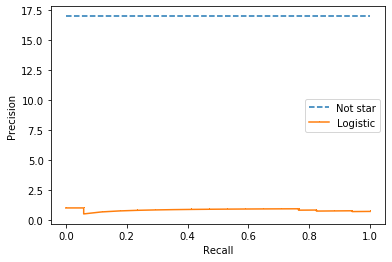

In [19]:
# plot the precision and recall curves
not_star = len(y_test[y_test==1]/len(y_test))
pyplot.plot([0,1],[not_star,not_star], linestyle='--', label= 'Not star')
pyplot.plot(lr_recall,lr_precision,marker=',',label='Logistic')

# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')

#show the legend
pyplot.legend()

# show the plot
pyplot.show()

In [17]:
#### Performing oversampling technique ###


1    751
0    751
Name: Rising_Star, dtype: int64

In [18]:
#import the package for smote
from imblearn.over_sampling import SMOTE

## before oversampling
y_train.value_counts()


1    751
0    751
Name: Rising_Star, dtype: int64

In [19]:
smt=SMOTE()
x_train,y_train=smt.fit_sample(x_train,y_train)

In [20]:
y_train.value_counts()

1    751
0    751
Name: Rising_Star, dtype: int64

In [21]:
np.bincount(y_train)

array([751, 751], dtype=int64)

In [22]:
accuracy_score(y_test,predictions)

0.9816176470588235

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score
model = LogisticRegression()
model.fit(x_train,y_train)

predictions = model.predict(x_test)
print('Classification Report')
print(classification_report(y_test, predictions))
print('Confusion Matrix')
print(confusion_matrix(y_test, predictions))
print('Accuracy Score')
print(accuracy_score(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       255
           1       0.57      0.94      0.71        17

    accuracy                           0.95       272
   macro avg       0.78      0.95      0.84       272
weighted avg       0.97      0.95      0.96       272

Confusion Matrix
[[243  12]
 [  1  16]]
Accuracy Score
0.9522058823529411
